<h1 style="color:#c4960c">PANDAS - DATA ANALYSIS LESSON</h1>
<h3>Finance Reports</h3>
<hr>

<h4 style="color:#c4960c">Imports</h4>

In [1]:
import import_ipynb
import pandas as pd
import numpy as np
import os
import sys
import math
import functools
import statistics
import datetime

In [70]:
from matplotlib import pyplot as plt
from bokeh.plotting import *
from bokeh.io import *
from bokeh.models.tools import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.models import Div
from bokeh.layouts import *

<h4 style="color:#c4960c">DataFrames</h4>
<h5>Payment Sheet (Jan 2011 - Jan 2020)</h5>
<hr>

In [3]:
payments = pd.read_csv('https://raw.githubusercontent.com/kjtakke/Data-Sets/master/Payments.csv', header=0)
payments.head()

,Biller,Ammount,Date
0,5872184,3591.52,"2013,3,12"
1,4425416,3094.26,"2011,12,25"
2,21074,5248.48,"2012,8,31"
3,2309813,16814.31,"2013,7,22"
4,1558607,4490.25,"2013,3,21"


<h5>Biller Details</h5>
<hr>

In [4]:
companies = pd.read_csv('https://raw.githubusercontent.com/kjtakke/Data-Sets/master/Companies.csv', header=0)
companies.head()

,ACC,name,domain,year founded,industry,size range,locality,country,linkedin url
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung


<h5>Merge/Join (Left)</h5>
<hr>

In [5]:
finance_sheet = pd.merge(payments, companies, left_on="Biller", right_on="ACC", how='left')
finance_sheet.head()

,Biller,Ammount,Date,ACC,name,domain,year founded,industry,size range,locality,country,linkedin url
0,5872184,3591.52,"2013,3,12",5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm
1,4425416,3094.26,"2011,12,25",4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services
2,21074,5248.48,"2012,8,31",21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture
3,2309813,16814.31,"2013,7,22",2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army
4,1558607,4490.25,"2013,3,21",1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung


<h3 style="color:#c4960c">Analysis</h3>
<h4>Biller Ratings</h4>
<hr>

<h5>Top 10 to Billers by number of transactions</h5>

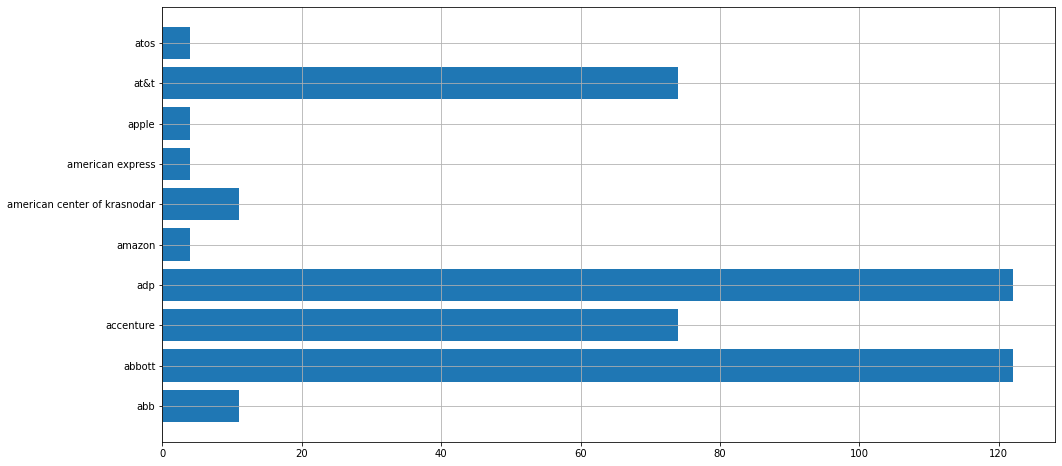

In [6]:
biller_payment_quantity = finance_sheet.pivot_table(index=["name"], values=["Biller"], aggfunc=np.count_nonzero)
biller_payment_quantity = pd.DataFrame(biller_payment_quantity.to_records())
biller_payment_quantity.sort_values(["Biller"],ascending=False)
biller_payment_quantity = biller_payment_quantity.iloc[0:10]
biller_payment_quantity_x = biller_payment_quantity["name"]
biller_payment_quantity_y = biller_payment_quantity["Biller"]
plt.figure(figsize=(16,8))
plt.barh(biller_payment_quantity_x, biller_payment_quantity_y)
plt.grid()

<h5>Top 10 to Billers by Payment Ammount</h5>

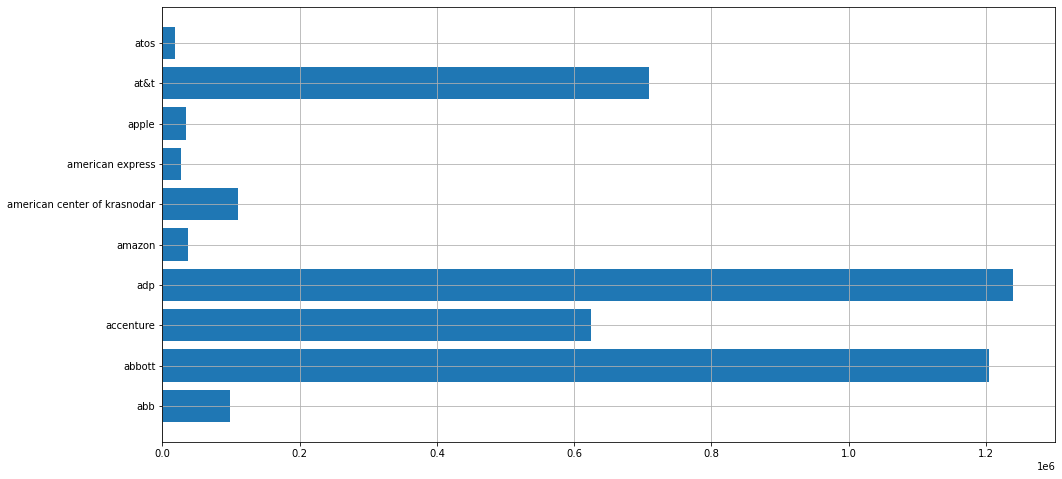

In [69]:
biller_payment_ammount = finance_sheet.pivot_table(index=["name"], values=["Ammount"], aggfunc=np.sum)
biller_payment_ammount = pd.DataFrame(biller_payment_ammount.to_records())
biller_payment_ammount.sort_values(["Ammount"],ascending=False)
biller_payment_ammount = biller_payment_ammount.iloc[0:10]
biller_payment_ammount_x = biller_payment_ammount["name"]
biller_payment_ammount_y = biller_payment_ammount["Ammount"]
plt.figure(figsize=(16,8))
plt.barh(biller_payment_ammount_x, biller_payment_ammount_y)
plt.grid()

<h3 style="color:#c4960c">Creating a date centric Dataset</h3>

In [8]:
payments_over_time = finance_sheet.pivot_table(index=["Date"], values=["Ammount"], aggfunc=np.sum)
payments_over_time = pd.DataFrame(payments_over_time.to_records())
payments_over_time
payments_over_time_date = payments_over_time["Date"]

<h4>Lambdas</h4>

In [9]:
year_from_date = lambda x: x.year     # Converts a date to year
month_from_date = lambda x: x.month   # Converts a date to month
day_from_date = lambda x: x.weekday() # Converts a date to weehday (Sunday = 0)

<h4>Functions</h4>

In [10]:
def todate(x):
    x = str(x)
    x = x.split(',')
    y = int(x[0])
    m = int(x[1])
    d = int(x[2])
    return datetime.date(y,m,d)

In [11]:
def day_name_from_date(x):
    """Converts a date into weekday"""
    x = str(x)
    x = x.replace("0", "Sun")
    x = x.replace("1", "Mon")
    x = x.replace("2", "Tue")
    x = x.replace("3", "Wed")
    x = x.replace("4", "Thu")
    x = x.replace("5", "Fri")
    x = x.replace("6", "Sat")
    return x

In [12]:
def quarter_name_from_date(x):
    """Converts a date into quarter"""
    x = str(x)
    x = x.replace("1", "1")
    x = x.replace("2", "1")
    x = x.replace("3", "1")
    x = x.replace("4", "2")
    x = x.replace("5", "2")
    x = x.replace("6", "2")
    x = x.replace("7", "3")
    x = x.replace("8", "3")
    x = x.replace("9", "3")
    x = x.replace("10", "4")
    x = x.replace("11", "4")
    x = x.replace("12", "4")
    x = int(x)
    return x

<h4>Column Creation</h4>

In [13]:
payments_over_time_date = list(map(todate, payments_over_time_date))
payments_over_time_year = list(map(year_from_date, payments_over_time_date))
payments_over_time_month = list(map(month_from_date, payments_over_time_date))
payments_over_time_day = list(map(day_from_date, payments_over_time_date))
payments_over_time_day_name = list(map(day_name_from_date, payments_over_time_day))
payments_over_time_quarter = list(map(quarter_name_from_date, payments_over_time_month))
payments_over_time_ammount = payments_over_time["Ammount"]

<h4>Merge columns into a table/DataFrame</h4>

In [14]:
payments_over_time = pd.DataFrame(
    list(
        zip(
            payments_over_time_date, 
            payments_over_time_year,
            payments_over_time_month,
            payments_over_time_day,
            payments_over_time_day_name,
            payments_over_time_quarter,
            payments_over_time_ammount
        )
    )
)
payments_over_time.columns = ["Date", "year", "month", "day", "day_name", "quarter", "Ammount"]
payments_over_time

,Date,year,month,day,day_name,quarter,Ammount
0,2011-01-01,2011,1,5,Fri,1,18346.92
1,2011-01-10,2011,1,0,Sun,1,16526.18
2,2011-01-11,2011,1,1,Mon,1,7863.84
3,2011-01-12,2011,1,2,Tue,1,18693.27
4,2011-01-13,2011,1,3,Wed,1,29756.59
...,...,...,...,...,...,...,...
2226,2019-09-04,2019,9,2,Tue,3,20204.52
2227,2019-09-05,2019,9,3,Wed,3,15178.48
2228,2019-09-07,2019,9,5,Fri,3,14196.66
2229,2019-09-08,2019,9,6,Sat,3,17524.26


<h4>Pivot Table</h4>

In [15]:
payments_over_time_pivot_date_year = payments_over_time.pivot_table(
    index=["year","quarter"], 
    values=["Ammount"], 
    #columns=["day_name"], 
    aggfunc=np.sum
)

<h4>Chart</h4>

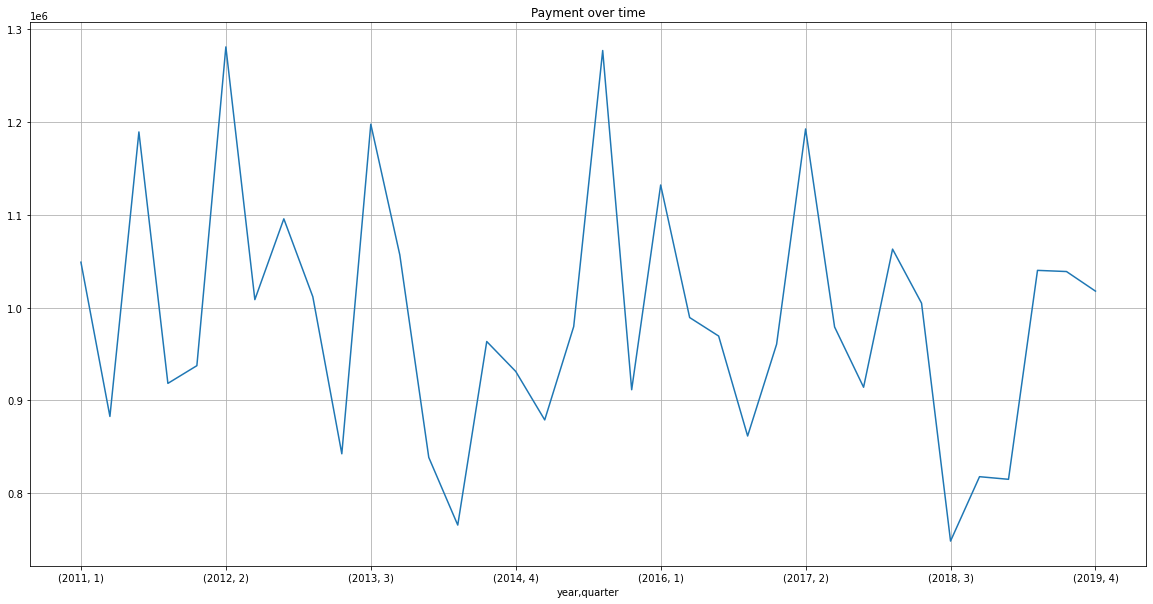

In [50]:
chart_payments_over_time_pivot_date_year = payments_over_time_pivot_date_year.plot(figsize=(20,10), title="Payment over time", legend=False)
chart_payments_over_time_pivot_date_year.grid()

<h3 style="color:#c4960c">Billing Ammount by Industry and Country</h3>

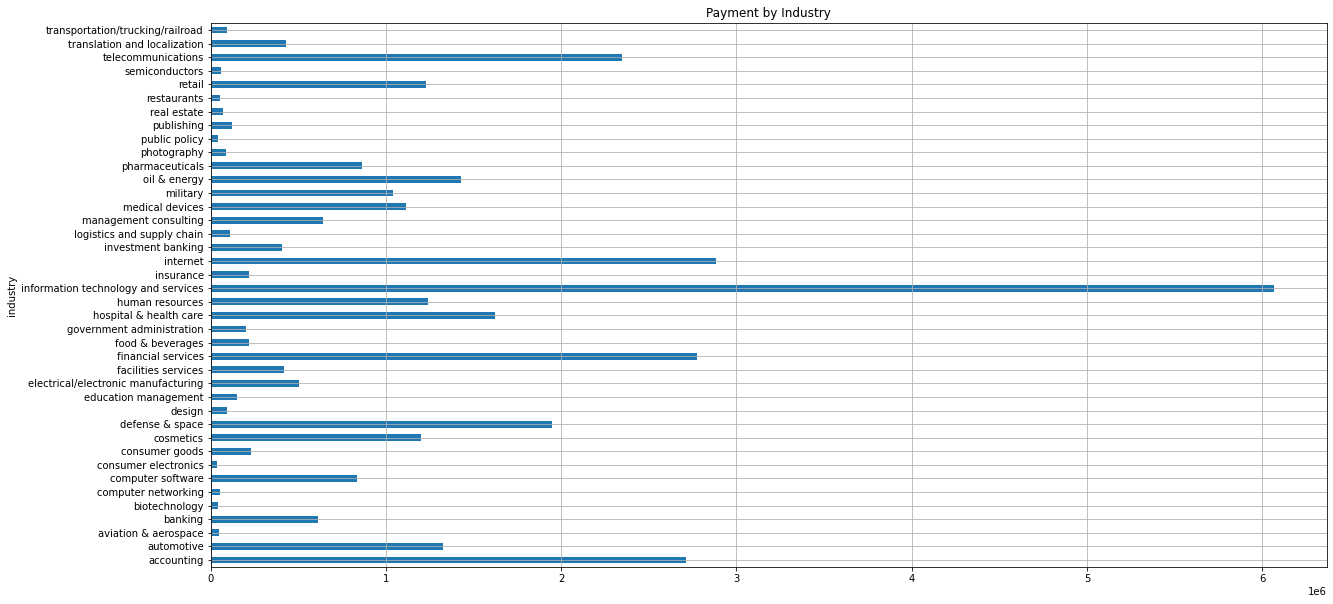

In [59]:
finance_by_industry = finance_sheet.pivot_table(index=["industry"], values=["Ammount"], aggfunc=np.sum)
finance_by_industry.plot.barh(figsize=(20,10), title="Payment by Industry", legend=False)
plt.grid()

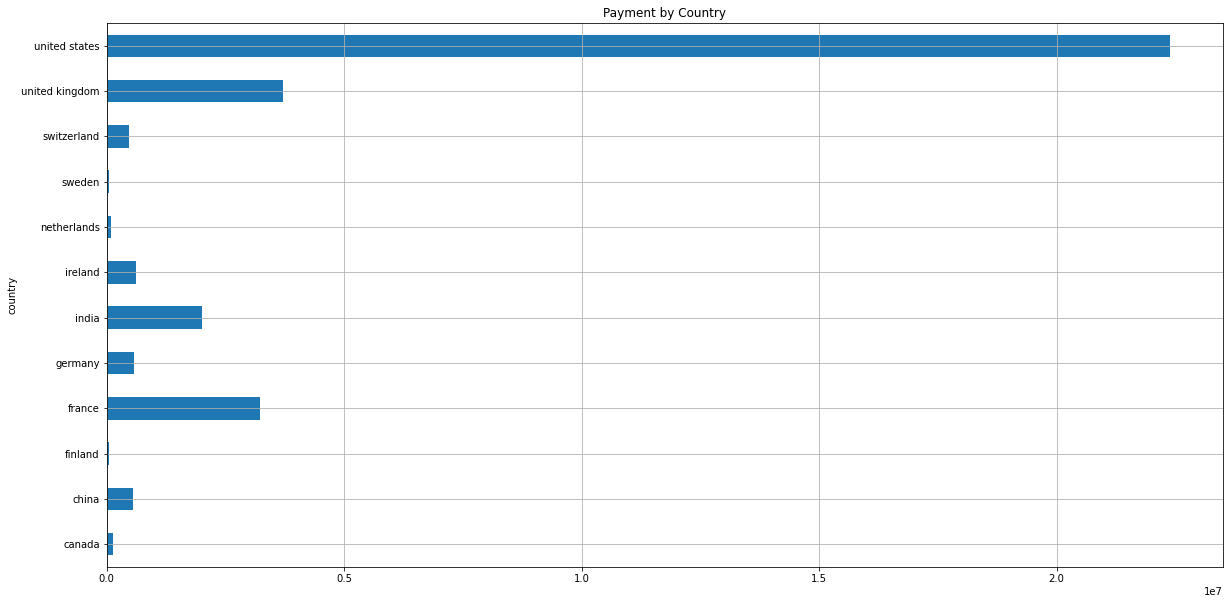

In [63]:
finance_by_country = finance_sheet.pivot_table(index=["country"], values=["Ammount"], aggfunc=np.sum)
finance_by_country.plot.barh(figsize=(20,10), title="Payment by Country", legend=False)
plt.grid()

In [40]:
finance_by_industry_by_country = finance_sheet.pivot_table(index=["industry"], values=["Ammount"], aggfunc=np.sum ,columns=["country"])
finance_by_industry_by_country    

Ammount                       \
country                                 canada      china   finland   
industry                                                              
accounting                                 NaN        NaN       NaN   
automotive                                 NaN        NaN       NaN   
aviation & aerospace                       NaN        NaN       NaN   
banking                              108509.84        NaN       NaN   
biotechnology                              NaN        NaN       NaN   
computer networking                        NaN        NaN       NaN   
computer software                          NaN        NaN       NaN   
consumer electronics                       NaN        NaN       NaN   
consumer goods                             NaN        NaN       NaN   
cosmetics                                  NaN        NaN       NaN   
defense & space                            NaN        NaN       NaN   
electrical/electronic manufacturing        NaN        NaN       NaN   
financial services                         NaN        NaN       NaN   
food & beverages                           NaN        NaN       NaN   
government administration                  NaN        NaN       NaN   
hospital & health care                     NaN        NaN       NaN   
human resources                            NaN        NaN       NaN   
information technology and services   28846.53        NaN       NaN   
insurance                                  NaN        NaN       NaN   
internet                                   NaN  434523.48       NaN   
investment banking                         NaN        NaN       NaN   
logistics and supply chain                 NaN        NaN       NaN   
management consulting                      NaN        NaN       NaN   
medical devices                            NaN        NaN       NaN   
military                                   NaN        NaN       NaN   
oil & energy                               NaN        NaN       NaN   
pharmaceuticals                            NaN        NaN       NaN   
public policy                              NaN        NaN       NaN   
real estate                                NaN        NaN       NaN   
restaurants                                NaN        NaN       NaN   
retail                                     NaN        NaN       NaN   
semiconductors                             NaN        NaN       NaN   
telecommunications                         NaN  111443.31  47595.37   
transportation/trucking/railroad           NaN        NaN       NaN   

                                                                        \
country                                  france    germany       india   
industry                                                                 
accounting                                  NaN        NaN         NaN   
automotive                                  NaN        NaN         NaN   
aviation & aerospace                        NaN        NaN         NaN   
banking                               452962.40        NaN         NaN   
biotechnology                               NaN        NaN         NaN   
computer networking                         NaN        NaN         NaN   
computer software                           NaN        NaN         NaN   
consumer electronics                        NaN        NaN         NaN   
consumer goods                              NaN        NaN         NaN   
cosmetics                            1146063.16        NaN         NaN   
defense & space                             NaN        NaN         NaN   
electrical/electronic manufacturing         NaN   63600.59         NaN   
financial services                          NaN        NaN         NaN   
food & beverages                            NaN        NaN         NaN   
government administration                   NaN        NaN         NaN   
hospital & health care                      NaN        NaN         NaN   
human